In [20]:
import warnings
import numpy as np
import STAGATE_pyG
import LEGEND as lg
import scanpy as sc
import squidpy as sq
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
adata_rna = lg.load_mouse_cortex()
adata_st, img = lg.load_mouse_brain()

/usr/local/anaconda3/envs/legend/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/anaconda3/envs/legend/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
adata_rna

AnnData object with n_obs × n_vars = 21697 × 36825
    obs: 'sample_name', 'organism', 'donor_sex', 'cell_class', 'cell_subclass', 'cell_cluster', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'n_genes'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cell_class_colors', 'cell_subclass_colors', 'hvg', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [17]:
adata_rna.obs['cell_subclass'].unique()

['Pvalb', 'L4', 'Vip', 'L2/3 IT', 'Lamp5', ..., 'Meis2', 'Macrophage', 'CR', 'VLMC', 'SMC']
Length: 23
Categories (23, object): ['Astro', 'CR', 'Endo', 'L2/3 IT', ..., 'Sncg', 'Sst', 'VLMC', 'Vip']

In [4]:
adata_st

AnnData object with n_obs × n_vars = 2702 × 19652
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'spatial'
    obsm: 'spatial'

In [5]:
img.shape

(11757, 11291, 3)

In [6]:
args = {
        "version": "ps",
        "verbosity": 0,
        "relevant_gene_pct": 10,
        "return_info": True,
    }

In [7]:
info_rna, sc_genes = lg.GeneClust(
    adata_rna, n_obs_clusters=23, modality="sc", **args
)

2023-12-22 18:57:20.241 | WARNING  | LEGEND._validation:check_raw_counts:71 - Will directly use the possible normalized counts found in `adata.X`.


In [8]:
info_rna

AnnData object with n_obs × n_vars = 3076 × 3683
    obs: 'sample_name', 'organism', 'donor_sex', 'cell_class', 'cell_subclass', 'cell_cluster', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'n_genes', 'cluster'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'relevance', 'outlier_score', 'cluster', 'representative'
    uns: 'cell_class_colors', 'cell_subclass_colors', 'hvg', 'neighbors', 'pca', 'umap', 'MST'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs', 'X_pca'
    obsp: 'connectivities', 'distances'
    varp: 'redundancy'

In [9]:
info_st, st_genes = lg.GeneClust(
    adata_st, img, n_obs_clusters=15, modality="st", alpha=0.7, **args
)

In [10]:
info_st

AnnData object with n_obs × n_vars = 1616 × 1966
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'relevance', 'outlier_score', 'cluster', 'representative'
    uns: 'spatial', 'log1p', 'spatial_neighbors', 'MST'
    obsm: 'spatial', 'X_pca'
    varm: 'X_pca'
    obsp: 'spatial_connectivities', 'spatial_distances'
    varp: 'redundancy'

In [11]:
integration_info, integrated_genes = lg.integrate(
    adata_rna=info_rna, adata_st=info_st, return_info=True
)

2023-12-22 19:07:00.612 | INFO  | Detected 1230 genes shared by SRT and scRNA-seq.
2023-12-22 19:07:01.401 | INFO  | Start to compute complementarity on SRT data...
2023-12-22 19:07:01.403 | INFO  | Computing gene complementarity...
2023-12-22 19:07:10.839 | INFO  | Gene complementarity computed.
2023-12-22 19:07:10.841 | INFO  | Start to compute complementarity on scRNA-seq data...
2023-12-22 19:07:10.842 | INFO  | Computing gene complementarity...
2023-12-22 19:07:20.990 | INFO  | Gene complementarity computed.
2023-12-22 19:07:21.157 | INFO  | Selected 301 genes.


In [12]:
sc.pp.normalize_total(adata_st, target_sum=1e4)
sc.pp.log1p(adata_st)
STAGATE_pyG.Cal_Spatial_Net(adata_st, rad_cutoff=150)
adata_st = STAGATE_pyG.train_STAGATE(adata_st, save_reconstrction=True)

------Calculating spatial graph...
The graph contains 15712 edges, 2702 cells.
5.8150 neighbors per cell on average.
Size of Input:  (2702, 19652)


100%|██████████| 1000/1000 [00:22<00:00, 43.99it/s]


In [13]:
adata_st

AnnData object with n_obs × n_vars = 2702 × 19652
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'spatial', 'log1p', 'Spatial_Net'
    obsm: 'spatial', 'STAGATE'
    layers: 'STAGATE_ReX'

In [19]:
integration_info.var.loc[["Caly", "Zcchc18"], 'cluster']

Caly       48
Zcchc18    48
Name: cluster, dtype: int64

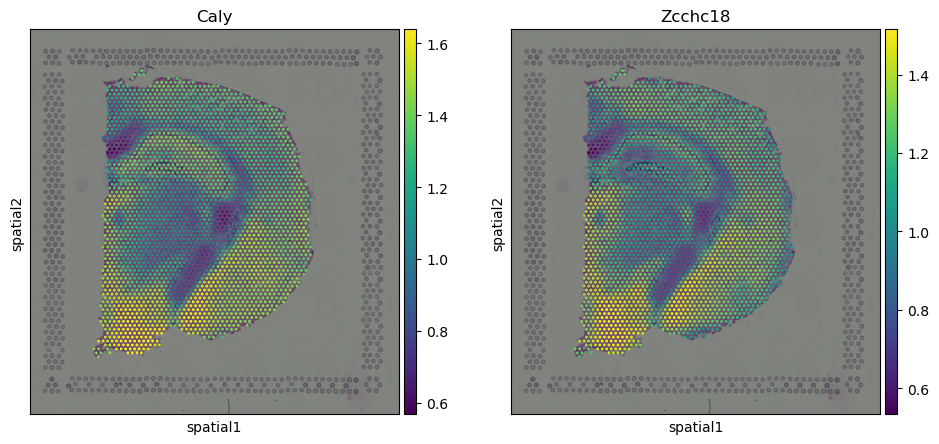

In [21]:
sq.pl.spatial_scatter(adata_st, layer='STAGATE_ReX', color=["Caly", "Zcchc18"], figsize=(5, 5))
plt.savefig("co-expression.png", dpi=300, bbox_inches='tight')